# CS505 Final project Garbage Sorting Project
## Importing Python Libraries

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import cv2
import PIL.Image as Image

import numpy as  np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 

##  Load Garbages dataset

In [6]:
data_dir = 'C:\\Users\\aweso\\Desktop\\cs505\\final_project\\Data\\garbages'
print(data_dir)

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
print(type(data_dir))

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

C:\Users\aweso\Desktop\cs505\final_project\Data\garbages
<class 'pathlib.WindowsPath'>
2527


## Create the dictionary for the Garbage images

In [7]:
garbages_images_dict = {
    
    'cardboard': list(data_dir.glob('cardboard/*')),
    'glass': list(data_dir.glob('glass/*')),
    'metal': list(data_dir.glob('metal/*')),
    'paper': list(data_dir.glob('paper/*')),
    'plastic': list(data_dir.glob('plastic/*')),
    'trash': list(data_dir.glob('trash/*')),
    
}

## Creates a dictionary to map types of garbage to numerical labels (0, 1, 2, ...).

In [11]:
garbages_labels_dict = {
    'cardboard': 0,
    'glass': 1,
    'metal': 2,
    'paper': 3,
    'plastic': 4,
    'trash': 5,
}

## Creates a training dataset for machine learning models

In [12]:
X, y = [], []

for garbage_name, images in garbages_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(garbages_labels_dict[garbage_name])

In [13]:
X = np.array(X)
y = np.array(y)

## Train test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

##  Representing Labels using one-hot-encoding

In [15]:
k = np.unique(y).size

Y_oh_train = to_categorical(y_train, k) 
Y_oh_val = to_categorical(y_val, k) 
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[2 2 4 1 0]

Y_oh_train[:5]=
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


## Preprocessing: scale images

In [16]:
X_train_scaled = X_train / 255
X_val_scaled = X_val /255
X_test_scaled = X_test / 255

## Task 1: develop a Fully Connected Neural Network and train & test the garbages data

In [21]:
def my_FullyConnectedModel(my_shape=(224,224,3), k=6, lr=0.15):
   
  inputs = Input(shape=my_shape)
  hidden1 = Dense(units=100)(inputs)
  hidden2 = Dense(units=100)(hidden1)
  hidden3 = Dense(units=100)(hidden2)
  hidden4 = Dense(units=100)(hidden3)
  flat = tf.keras.layers.Flatten()(hidden4)
  out1 = Dense(k, activation='softmax')(flat)
  model = Model(inputs=inputs, outputs=out1)
   
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
   
  return model


In [22]:
model = my_FullyConnectedModel()
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 dense_5 (Dense)             (None, 224, 224, 100)     400       
                                                                 
 dense_6 (Dense)             (None, 224, 224, 100)     10100     
                                                                 
 dense_7 (Dense)             (None, 224, 224, 100)     10100     
                                                                 
 dense_8 (Dense)             (None, 224, 224, 100)     10100     
                                                                 
 flatten_1 (Flatten)         (None, 5017600)           0         
                                                                 
 dense_9 (Dense)             (None, 6)                 3010

In [23]:
my_batch_size = 50
my_epochs = 20

history = model.fit(X_train_scaled, Y_oh_train, batch_size=my_batch_size, epochs=my_epochs, validation_data=(X_val_scaled, Y_oh_val))


Epoch 1/20


31/31 [==============================] - 203s 6s/step - loss: 181072464.0000 - accuracy: 0.1677 - val_loss: 40625872.0000 - val_accuracy: 0.1581
Epoch 2/20
31/31 [==============================] - 190s 6s/step - loss: 25255074.0000 - accuracy: 0.1809 - val_loss: 5019779.0000 - val_accuracy: 0.1976
Epoch 3/20
31/31 [==============================] - 238s 8s/step - loss: 1662602.3750 - accuracy: 0.2191 - val_loss: 389095.8438 - val_accuracy: 0.2668
Epoch 4/20
31/31 [==============================] - 232s 8s/step - loss: 415819.4375 - accuracy: 0.2594 - val_loss: 453639.2500 - val_accuracy: 0.1759
Epoch 5/20
31/31 [==============================] - 236s 8s/step - loss: 184815.6562 - accuracy: 0.3254 - val_loss: 75568.2188 - val_accuracy: 0.3399
Epoch 6/20
31/31 [==============================] - 215s 7s/step - loss: 123833.1016 - accuracy: 0.3413 - val_loss: 106117.1641 - val_accuracy: 0.3755
Epoch 7/20
31/31 [==============================] - 213s 7s/step - loss: 68303.5859 

In [24]:
test_accuracy = model.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy)

16/16 [==============================] - 17s 1s/step - loss: 12531.7568 - accuracy: 0.3854
[12531.7568359375, 0.3853754997253418]


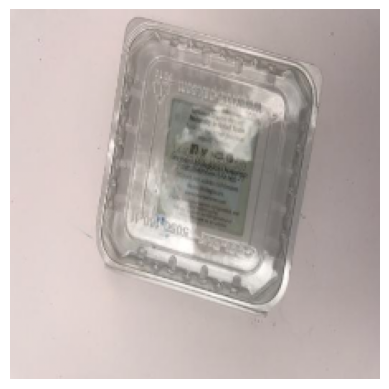

In [25]:
# choose an image from the testing dataset for testing, for example X_test_scaled[10] 
# you can try other images if you want by changing the index of X_test_scaled
import matplotlib.pylab as plt

testing_image = X_test_scaled[10]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]

In [26]:
pred = model.predict(testing_image)

labels = list(garbages_labels_dict.keys())

predicted_label =labels[np.argmax(pred)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 1s 534ms/step
The predicted label for this image is:  paper


## Task 2: develop a Convolutional Neural Network and train & test the garbages data

In [27]:
def my_CNN_Model(my_shape=(224, 224, 3), k=6, lr=1e-4):
    # Input layer
    model_input = tf.keras.layers.Input(shape=my_shape)
    
    # Convolutional layers
    l1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(l1)
    l2_drop = tf.keras.layers.Dropout(0.25)(l2)
    
    # Max pooling layer
    l3 = tf.keras.layers.MaxPool2D((2, 2))(l2_drop)
    
    # Another Convolutional layer
    l4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(l3)
    l4_drop = tf.keras.layers.Dropout(0.25)(l4)
    
    # Flatten layer
    flat = tf.keras.layers.Flatten()(l4_drop)
    
    # Output layer
    out = tf.keras.layers.Dense(k, activation='softmax')(flat)
    
    # Create the model
    model = tf.keras.models.Model(inputs=model_input, outputs=out)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
    
    return model


In [28]:
model2 = my_CNN_Model()
print(model2.summary())


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 220, 220, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                          

In [31]:
my_batch_size = 50
my_epochs = 10

history2 = model2.fit(X_train_scaled, Y_oh_train, batch_size=my_batch_size, epochs=my_epochs, validation_data=(X_val_scaled, Y_oh_val))


Epoch 1/10
31/31 [==============================] - 242s 8s/step - loss: 0.2438 - accuracy: 0.9439 - val_loss: 1.2695 - val_accuracy: 0.5514
Epoch 2/10
31/31 [==============================] - 238s 8s/step - loss: 0.1549 - accuracy: 0.9710 - val_loss: 1.3307 - val_accuracy: 0.5632
Epoch 3/10
31/31 [==============================] - 236s 8s/step - loss: 0.1330 - accuracy: 0.9782 - val_loss: 1.3763 - val_accuracy: 0.5632
Epoch 4/10
31/31 [==============================] - 232s 8s/step - loss: 0.1039 - accuracy: 0.9848 - val_loss: 1.3817 - val_accuracy: 0.5652
Epoch 5/10
31/31 [==============================] - 276s 9s/step - loss: 0.0906 - accuracy: 0.9842 - val_loss: 1.4433 - val_accuracy: 0.5850
Epoch 6/10
31/31 [==============================] - 270s 9s/step - loss: 0.0732 - accuracy: 0.9888 - val_loss: 1.5029 - val_accuracy: 0.5692
Epoch 7/10
31/31 [==============================] - 254s 8s/step - loss: 0.0615 - accuracy: 0.9908 - val_loss: 1.5576 - val_accuracy: 0.5573
Epoch 8/10
31

In [32]:
test_accuracy2 = model2.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy2)

16/16 [==============================] - 12s 725ms/step - loss: 1.6647 - accuracy: 0.5474
[1.6646665334701538, 0.5474308133125305]


In [33]:
pred2 = model2.predict(testing_image)

labels = list(garbages_labels_dict.keys())

predicted_label =labels[np.argmax(pred2)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 0s 297ms/step
The predicted label for this image is:  plastic
